### Carregamento das bibliotecas

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Carregamento do csv

In [35]:
df = pd.read_csv('merge.csv')

### Exploração inicial

In [36]:
df.head()

,date_ref,ana_code,mean_precipitation
0,2000-06-02,PSATCNV,0.000000
1,2000-06-02,PSATFUR,0.876453
2,2000-06-02,PSATFZA,0.009259
3,2000-06-02,PSATIMBR,0.373096
4,2000-06-02,PSATITP,0.002860


In [37]:
df.columns

Index(['date_ref', 'ana_code', 'mean_precipitation'], dtype='object')

In [38]:
df.dtypes

date_ref               object
ana_code               object
mean_precipitation    float64
dtype: object

### Transformar a coluna de datas do tipo String para o tipo Date

In [39]:
df['date_ref'] = pd.to_datetime(df['date_ref'])

In [40]:
df.dtypes

date_ref              datetime64[ns]
ana_code                      object
mean_precipitation           float64
dtype: object

In [41]:
df.head(5)

,date_ref,ana_code,mean_precipitation
0,2000-06-02,PSATCNV,0.000000
1,2000-06-02,PSATFUR,0.876453
2,2000-06-02,PSATFZA,0.009259
3,2000-06-02,PSATIMBR,0.373096
4,2000-06-02,PSATITP,0.002860


In [42]:
df.shape

(69720, 3)

In [43]:
df.info

<bound method DataFrame.info of         date_ref  ana_code  mean_precipitation
0     2000-06-02   PSATCNV            0.000000
1     2000-06-02   PSATFUR            0.876453
2     2000-06-02   PSATFZA            0.009259
3     2000-06-02  PSATIMBR            0.373096
4     2000-06-02   PSATITP            0.002860
...          ...       ...                 ...
69715 2024-04-11  PSATIMBR            1.246193
69716 2024-04-11   PSATITP            1.773169
69717 2024-04-11  PSATJIRA            3.654481
69718 2024-04-11   PSATLAJ            4.200204
69719 2024-04-11  PSATPIME            6.187466

[69720 rows x 3 columns]>

### Alterando o índice da tabela para a data da observação

In [44]:
df.index

RangeIndex(start=0, stop=69720, step=1)

In [45]:
df.set_index('date_ref', inplace=True)

In [46]:
df.index

DatetimeIndex(['2000-06-02', '2000-06-02', '2000-06-02', '2000-06-02',
               '2000-06-02', '2000-06-02', '2000-06-02', '2000-06-02',
               '2000-06-03', '2000-06-03',
               ...
               '2024-04-10', '2024-04-10', '2024-04-11', '2024-04-11',
               '2024-04-11', '2024-04-11', '2024-04-11', '2024-04-11',
               '2024-04-11', '2024-04-11'],
              dtype='datetime64[ns]', name='date_ref', length=69720, freq=None)

In [47]:
df.head()

,ana_code,mean_precipitation
date_ref,,
2000-06-02,PSATCNV,0.000000
2000-06-02,PSATFUR,0.876453
2000-06-02,PSATFZA,0.009259
2000-06-02,PSATIMBR,0.373096
2000-06-02,PSATITP,0.002860


### Filtrando os dados da bacia para análise

In [48]:
bacia = 'PSATCNV'
filtro_por_bacia = df['ana_code'] == bacia

df_bacia = df[filtro_por_bacia]

In [49]:
df_bacia

,ana_code,mean_precipitation
date_ref,,
2000-06-02,PSATCNV,0.000000
2000-06-03,PSATCNV,0.000000
2000-06-04,PSATCNV,0.005814
2000-06-05,PSATCNV,4.839147
2000-06-06,PSATCNV,8.423450
...,...,...
2024-04-07,PSATCNV,0.792636
2024-04-08,PSATCNV,6.962209
2024-04-09,PSATCNV,0.413760


### Verificação de valores inválidos

In [50]:
df_bacia.isna().sum()

ana_code              0
mean_precipitation    0
dtype: int64

In [58]:
valores_menores_que_zero = df_bacia['mean_precipitation'] < 0
df_bacia[valores_menores_que_zero]

,ana_code,mean_precipitation
date_ref,,


In [57]:
valores_iguais_a_zero = df_bacia['mean_precipitation'] == 0
df_bacia[valores_iguais_a_zero]

,ana_code,mean_precipitation
date_ref,,
2000-06-02,PSATCNV,0.0
2000-06-03,PSATCNV,0.0
2000-06-23,PSATCNV,0.0
2000-06-24,PSATCNV,0.0
2000-07-04,PSATCNV,0.0
...,...,...
2023-12-29,PSATCNV,0.0
2024-01-14,PSATCNV,0.0
2024-02-04,PSATCNV,0.0


In [62]:
valores_maiores_que_zero = df_bacia['mean_precipitation'] > 0
df_bacia.shape[0] == df_bacia[valores_maiores_que_zero].shape[0] + df_bacia[valores_iguais_a_zero].shape[0]

True

## Visualização gráfica da precipitação

In [63]:
df_bacia['mean_precipitation'].describe()

count    8715.000000
mean        4.731443
std         9.310892
min         0.000000
25%         0.051357
50%         0.548450
75%         5.090843
max       100.245155
Name: mean_precipitation, dtype: float64

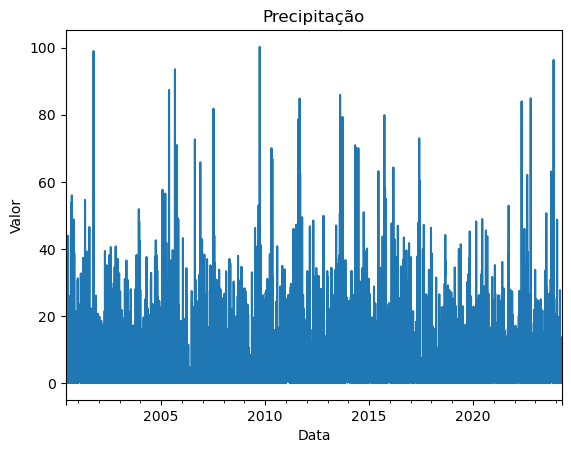

In [70]:
df_bacia['mean_precipitation'].plot()
# Adicionando título e labels
plt.title('Precipitação')
plt.xlabel('Data')
plt.ylabel('Valor')

# Mostrar o gráfico
plt.show()